In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt



crimes1 = pd.read_csv('../project/archive/Chicago_Crimes_2001_to_2004.csv',error_bad_lines=False)
crimes2 = pd.read_csv('../project/archive/Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)
crimes3 = pd.read_csv('../project/archive/Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
crimes4 = pd.read_csv('../project/archive/Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)
crimes = pd.concat([crimes1, crimes2, crimes3, crimes4], ignore_index=False, axis=0)

del crimes1
del crimes2
del crimes3
del crimes4

crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [43]:
crimes.drop(['Unnamed: 0', 'Case Number', 'IUCR','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location'], inplace=True, axis=1)

In [44]:
crimes.head(3)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
0,4786321,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,4.0,NaN,NaN,NaN,NaN
1,4676906,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,1173974.0,1.87676e+06,41.8172,-87.637328
2,4789749,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,14.0,NaN,NaN,NaN,NaN


In [45]:
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# change date format and assign the date to the index
crimes.index = pd.DatetimeIndex(crimes.Date)

In [46]:
crimes.head(3)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
Date,,,,,,,,,,,,,
2004-01-01 00:01:00,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,4.0,NaN,NaN,NaN,NaN
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,1173974.0,1.87676e+06,41.8172,-87.637328
2004-06-20 11:00:00,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,14.0,NaN,NaN,NaN,NaN


In [47]:
crimes.shape

(6170812, 13)

In [48]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6170812 entries, 2004-01-01 00:01:00 to 2016-05-03 23:38:00
Data columns (total 13 columns):
ID                      int64
Date                    datetime64[ns]
Block                   object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
District                float64
X Coordinate            float64
Y Coordinate            object
Latitude                object
Longitude               float64
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 576.7+ MB


In [49]:
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'
#to both location description and description column change the unknown terms to other

In [50]:
crimes

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
Date,,,,,,,,,,,,,
2004-01-01 00:01:00,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,OTHER,RESIDENCE,False,False,4.0,NaN,NaN,NaN,NaN
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,1173974.0,1.87676e+06,41.8172,-87.637328
2004-06-20 11:00:00,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,OTHER,RESIDENCE,False,False,14.0,NaN,NaN,NaN,NaN
2004-12-30 20:00:00,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,OTHER,OTHER,False,False,25.0,NaN,NaN,NaN,NaN
2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,OTHER,RESIDENCE,False,False,22.0,1174948.0,1.83105e+06,41.6918,-87.635116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,1159105.0,1.8883e+06,41.8492,-87.691556
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,7.0,1175230.0,1.85618e+06,41.7607,-87.633335
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,OTHER,SIDEWALK,False,False,8.0,1161027.0,1.86281e+06,41.7792,-87.685207


In [39]:
crimes['Primary Type'] = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']  = pd.Categorical(crimes['Description'])

In [51]:
crimes

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
Date,,,,,,,,,,,,,
2004-01-01 00:01:00,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,OTHER,RESIDENCE,False,False,4.0,NaN,NaN,NaN,NaN
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,1173974.0,1.87676e+06,41.8172,-87.637328
2004-06-20 11:00:00,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,OTHER,RESIDENCE,False,False,14.0,NaN,NaN,NaN,NaN
2004-12-30 20:00:00,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,OTHER,OTHER,False,False,25.0,NaN,NaN,NaN,NaN
2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,OTHER,RESIDENCE,False,False,22.0,1174948.0,1.83105e+06,41.6918,-87.635116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,1159105.0,1.8883e+06,41.8492,-87.691556
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,7.0,1175230.0,1.85618e+06,41.7607,-87.633335
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,OTHER,SIDEWALK,False,False,8.0,1161027.0,1.86281e+06,41.7792,-87.685207


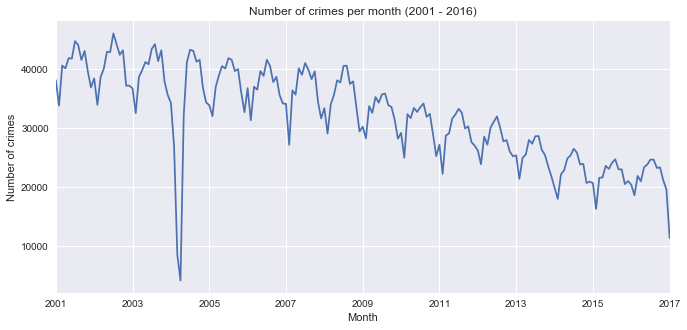

In [59]:
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2001 - 2016)')
plt.xlabel('Month')
plt.ylabel('Number of crimes')
plt.show()

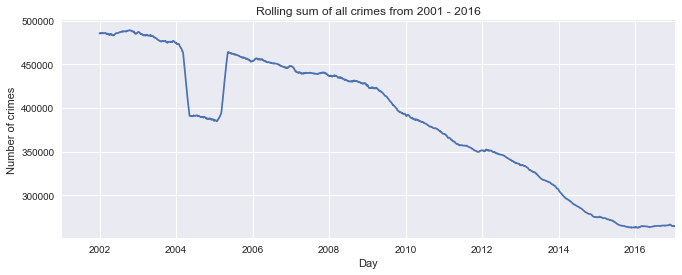

In [60]:
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2001 - 2016')
plt.ylabel('Number of crimes')
plt.xlabel('Day')
plt.show()

In [68]:
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
print(crimes_count_date)

Primary Type  ARSON  ASSAULT  BATTERY  BURGLARY  \
2001-01-01        0       70      296        66   
2001-01-02        0       66      143        68   
2001-01-03        1       79      165        57   
2001-01-04        1       57      173        55   
2001-01-05        3       68      178        55   
...             ...      ...      ...       ...   
2017-01-14        3       48      118        27   
2017-01-15        0       34      126        34   
2017-01-16        0       48      114        43   
2017-01-17        0       51       87        44   
2017-01-18        0       45       95        62   

Primary Type  CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
2001-01-01                                    0                   36   
2001-01-02                                    0                    2   
2001-01-03                                    0                    7   
2001-01-04                                    0                    2   
2001-01-05                 

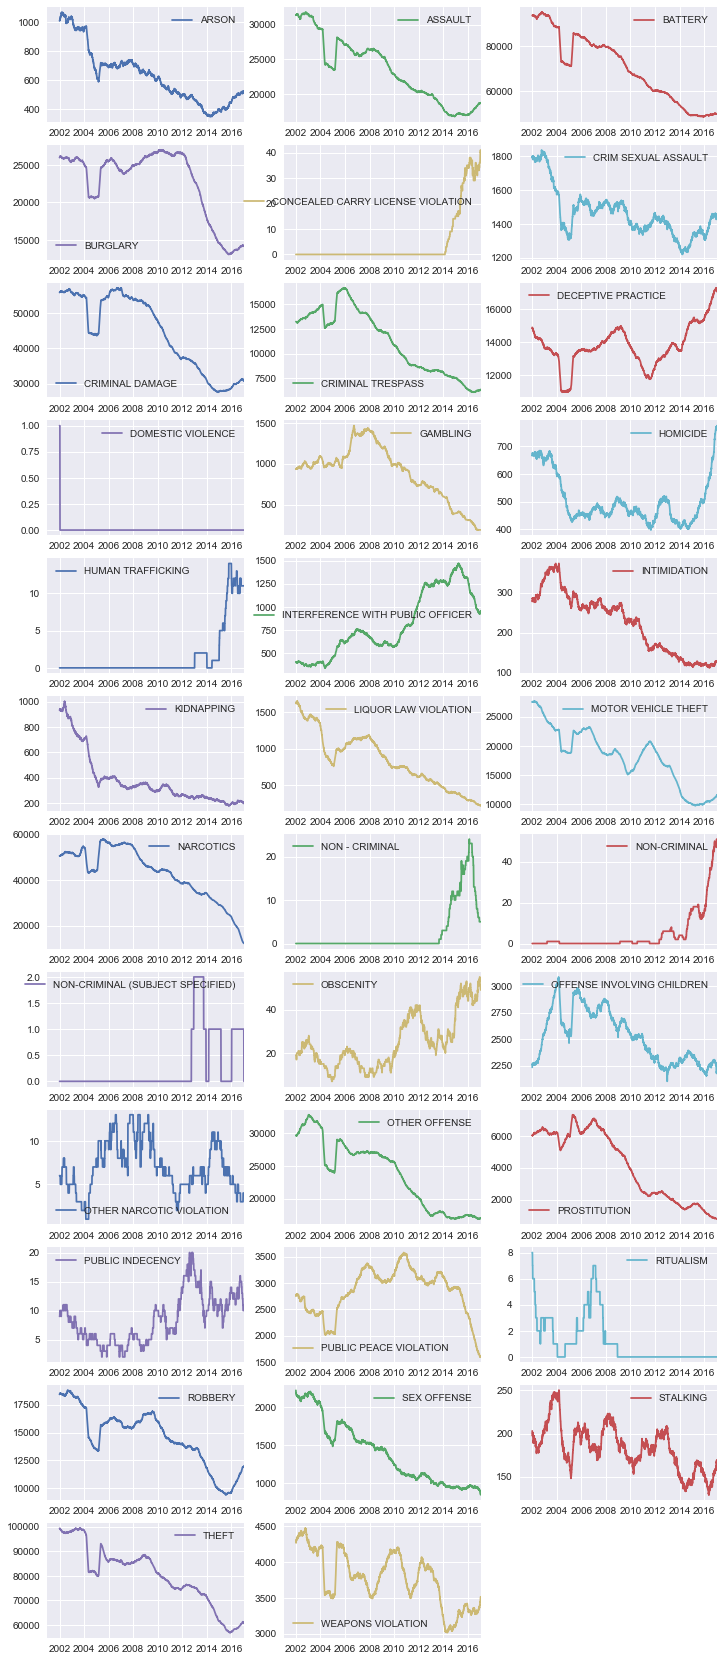

In [69]:
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

<Figure size 792x288 with 0 Axes>

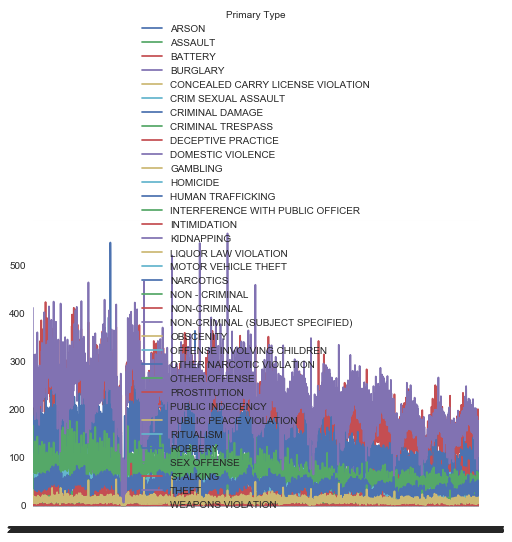

In [70]:
plt.figure(figsize=(11,4))
ax = crimes_count_date.plot(xticks=crimes_count_date.index)

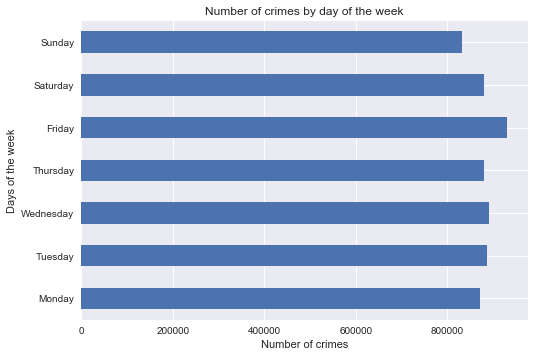

In [55]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

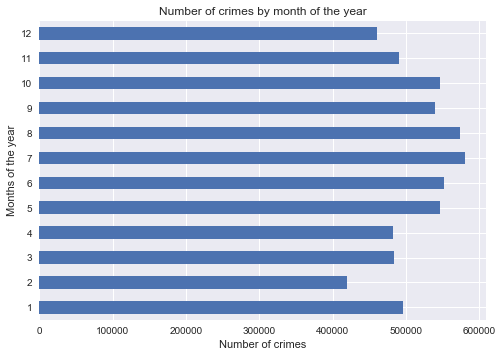

In [56]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

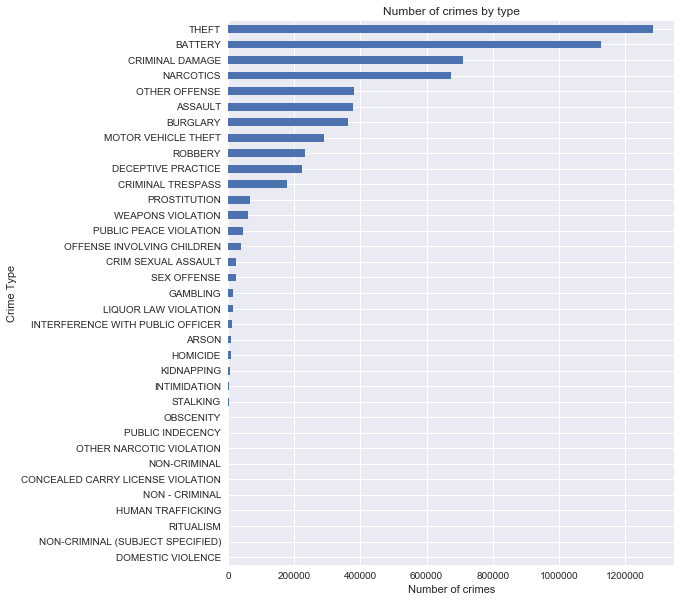

In [57]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

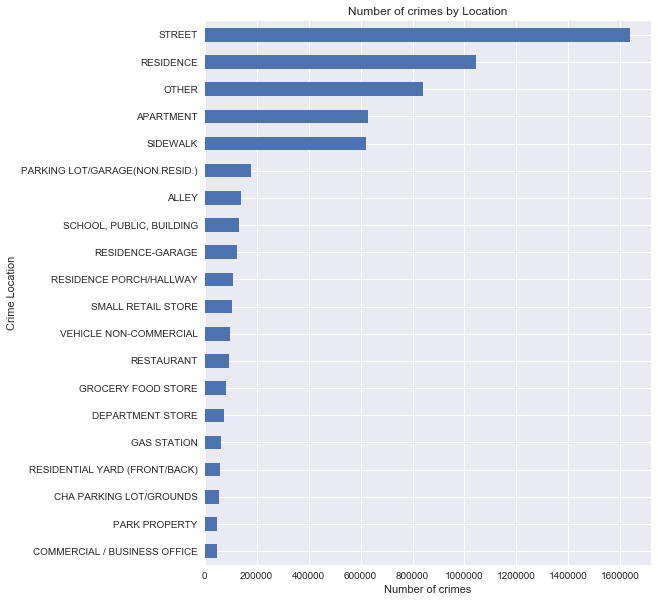

In [58]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()